# Objective 

Event modeling using 5000 events (100 per bin, 50 bins)

# Experiment description

* Chosen metric details (See: calib_metriceval_v2.ipynb): **exp7 - Daily KGE, 1 day smoothing, kge_a_alpha = 1.**
* 4 model runs
    * FUSE-PRMS
    * FUSE-HECHMS
    * FUSE-VIC
    * FUSE-SACSMA
    

In [12]:
import glob, os
import xarray as xr
import math
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
drydir = '/glade/work/manab/ff/eventmodeling/output/dry/'
pastprecipdir = '/glade/work/manab/ff/eventmodeling/output/past_precip'

In [3]:
def maxminlist(nclist, ncvar):
    '''Find the log of global maximum and minimum values in a list
    
    nclist: List of netCDF files
    ncvar: Variable for which netCDF
    return: Naturak log of max and min value
    '''
    maxlist = []
    minlist = []
    print('Calculating max/min from ' + str(len(nclist)) + ' netCDF files')
    for index, value in enumerate(nclist):
        tempval = xr.open_dataset(value)[ncvar]
        maxlist.append(tempval.max())
        minlist.append(tempval.min())
        
    return(np.log(max(maxlist)), np.log(min(minlist)))

# DRY

In [4]:
#prmslist =glob.glob(os.path.join(drydir, '**/*_111_runs_best*.nc'), recursive=True)
hechmslist1 =glob.glob(os.path.join(drydir, '**/*_222_runs_best*.nc'), recursive=True)
viclist1 =glob.glob(os.path.join(drydir, '**/*_333_runs_best*.nc'), recursive=True)
sacsmalist1 =glob.glob(os.path.join(drydir, '**/*_444_runs_best*.nc'), recursive=True)

#prmsmax, prmsmin = maxminlist(prmslist, 'q_routed')
hechmsmax1, hechmsmin1 = maxminlist(hechmslist1, 'q_routed')
vicmax1, vicmin1 = maxminlist(viclist1, 'q_routed')
sacsmamax1, sacsmamin1 = maxminlist(sacsmalist1, 'q_routed')

Calculating max/min from 5000 netCDF files
Calculating max/min from 5000 netCDF files
Calculating max/min from 5000 netCDF files


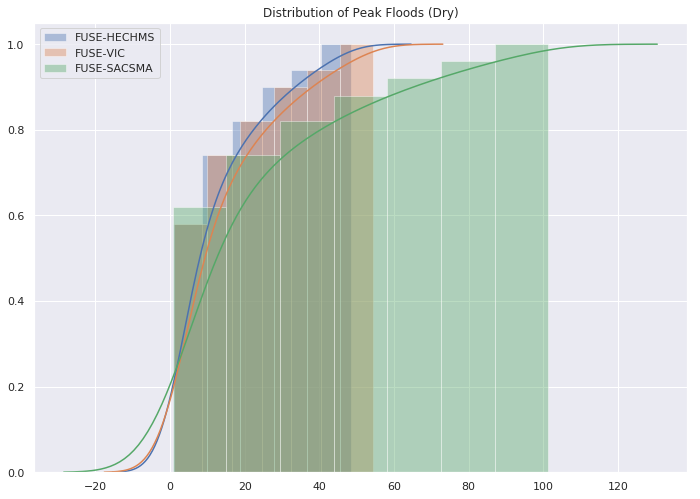

In [13]:
sns.distplot(np.exp(np.linspace(hechmsmax1, hechmsmin1, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax1, vicmin1, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax1, sacsmamin1, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of Peak Floods (Dry)")
plt.legend()
plt.show()

# PAST PRECIP

In [7]:
#prmslist =glob.glob(os.path.join(pastprecipdir, '**/*_111_runs_best*.nc'), recursive=True)
hechmslist2 =glob.glob(os.path.join(pastprecipdir, '**/*_222_runs_best*.nc'), recursive=True)
viclist2 =glob.glob(os.path.join(pastprecipdir, '**/*_333_runs_best*.nc'), recursive=True)
sacsmalist2 =glob.glob(os.path.join(pastprecipdir, '**/*_444_runs_best*.nc'), recursive=True)

In [8]:
#prmsmax, prmsmin = maxminlist(prmslist, 'q_routed')
hechmsmax2, hechmsmin2 = maxminlist(hechmslist2, 'q_routed')
vicmax2, vicmin2 = maxminlist(viclist2, 'q_routed')
sacsmamax2, sacsmamin2 = maxminlist(sacsmalist2, 'q_routed')

Calculating max/min from 5000 netCDF files
Calculating max/min from 5000 netCDF files
Calculating max/min from 5000 netCDF files


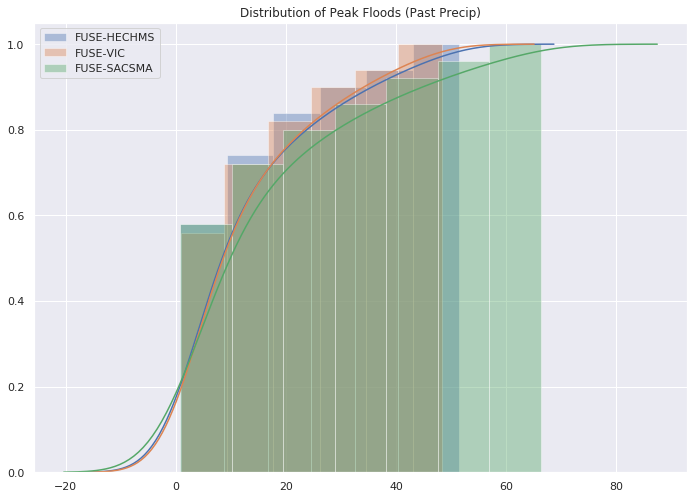

In [14]:
sns.distplot(np.exp(np.linspace(hechmsmax2, hechmsmin2, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax2, vicmin2, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax2, sacsmamin2, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA")
plt.title("Distribution of Peak Floods (Past Precip)")
plt.legend()
plt.show()

# Model-wise plots

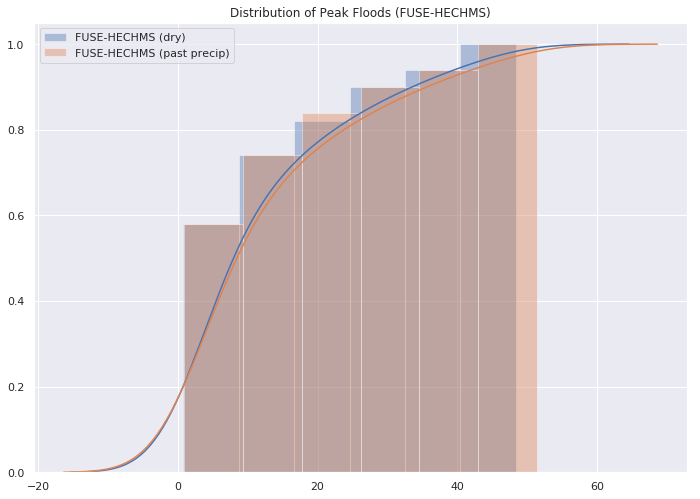

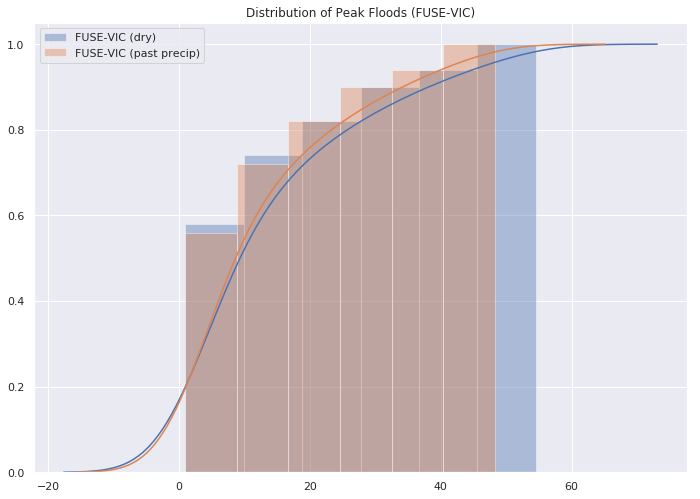

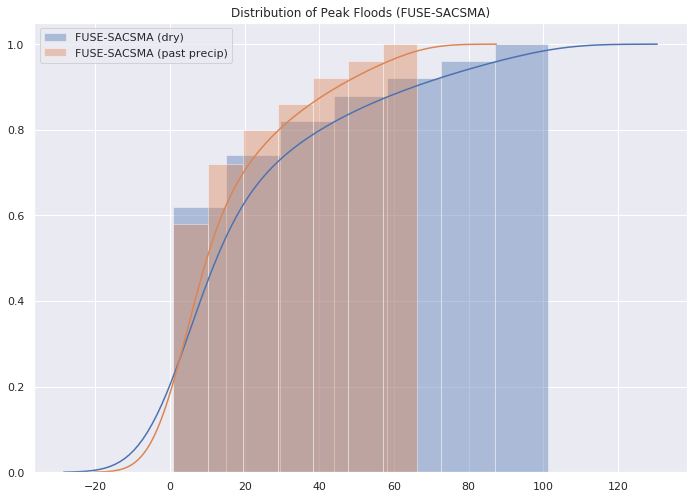

In [15]:
sns.distplot(np.exp(np.linspace(hechmsmax1, hechmsmin1, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS (dry)")
sns.distplot(np.exp(np.linspace(hechmsmax2, hechmsmin2, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-HECHMS (past precip)")
plt.title("Distribution of Peak Floods (FUSE-HECHMS)")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(vicmax1, vicmin1, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC (dry)")
sns.distplot(np.exp(np.linspace(vicmax2, vicmin2, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-VIC (past precip)")
plt.title("Distribution of Peak Floods (FUSE-VIC)")
plt.legend()
plt.show()

sns.distplot(np.exp(np.linspace(sacsmamax1, sacsmamin1, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA (dry)")
sns.distplot(np.exp(np.linspace(sacsmamax2, sacsmamin2, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="FUSE-SACSMA (past precip)")
plt.title("Distribution of Peak Floods (FUSE-SACSMA)")
plt.legend()
plt.show()